In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b2cff19fd4763182ff430d248bb705457a00fb6e5d46f6d7e234170c98b95143
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Import libraries
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector
import matplotlib.pyplot as plt
from IPython.display import display
from qiskit.quantum_info import Statevector


In [3]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [4]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>



In [5]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [6]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



Measurement Results: {'01': 1024}
     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0 


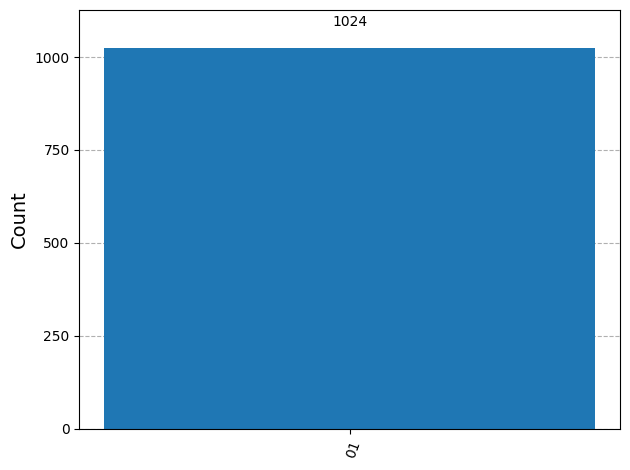

In [7]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
print(qc.draw('text'))
display(plot_histogram(counts))


Measurement Results: {'01': 263, '11': 256, '00': 246, '10': 259}
     ┌───┐┌───┐┌─┐
q_0: ┤ X ├┤ H ├┤M├
     ├───┤└┬─┬┘└╥┘
q_1: ┤ H ├─┤M├──╫─
     └───┘ └╥┘  ║ 
c: 2/═══════╩═══╩═
            1   0 


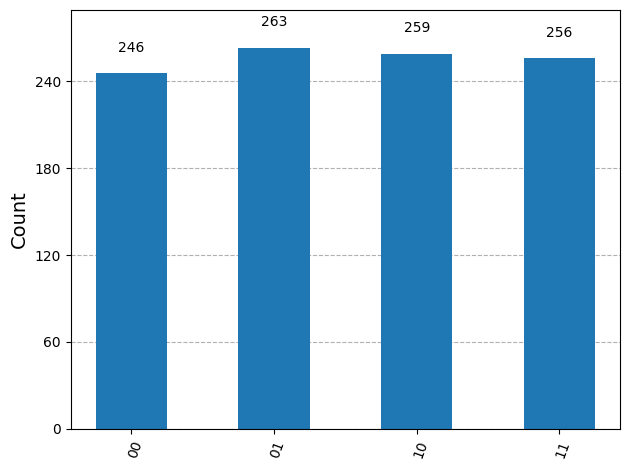

'Applying Hadamard gates to both qubits creates a uniform superposition of all possible computational basis states, resulting in equal measurement probabilities for 00, 01, 10, and 11.'

In [8]:
# 1. Change Gate Combination

qc = QuantumCircuit(2,2)

qc.x(0)
qc.h([0,1])

qc.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc,simulator)

job = simulator.run(compiled_circuit,shots = 1024)
result = job.result()

counts = result.get_counts()

print("Measurement Results:",counts)
print(qc.draw('text'))
display(plot_histogram(counts))

'''Applying Hadamard gates to both qubits creates a uniform superposition of all possible computational basis states, resulting in equal measurement probabilities for 00, 01, 10, and 11.'''

Measurement Results: {'01': 245, '10': 265, '00': 254, '11': 260}
     ┌───┐     ┌─┐   
q_0: ┤ H ├─────┤M├───
     ├───┤┌───┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


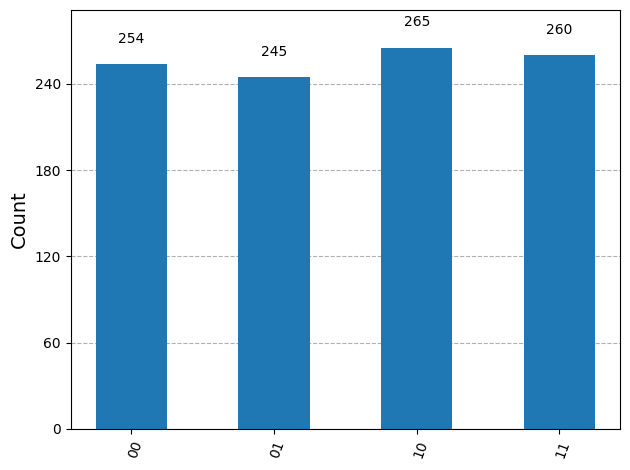

' Moving the X gate to a different qubit doesn’t affect the equal probability distribution — the superposition from the Hadamard gates still produces uniform outcomes.'

In [9]:
# 2. Swap Qubit Roles

qc = QuantumCircuit(2,2)

qc.x(1)
qc.h([0,1])

qc.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc,simulator)

job = simulator.run(compiled_circuit , shots = 1024)
result = job.result()

counts = result.get_counts()

print("Measurement Results:",counts)
print(qc.draw('text'))
display(plot_histogram(counts))

''' Moving the X gate to a different qubit doesn’t affect the equal probability distribution — the superposition from the Hadamard gates still produces uniform outcomes.'''

Measurement Results: {'11': 276, '01': 258, '00': 264, '10': 226}
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ H ├─────┤ X ├─╫─┤M├
     └───┘     └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


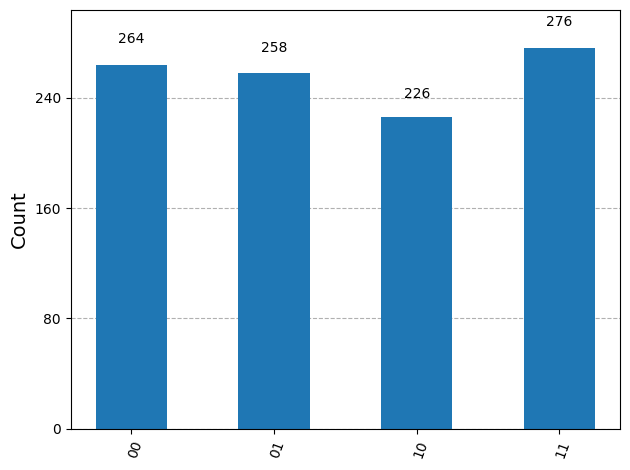

'The CNOT gate creates entanglement between the qubits but doesn’t alter the overall equal probabilities of the computational basis states.'

In [10]:
# 3. Add a CNOT Gate

qc = QuantumCircuit(2,2)

qc.x(0)
qc.h([0,1])
qc.cx(0,1)

qc.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc,simulator)

job = simulator.run(compiled_circuit,shots = 1024)
result = job.result()

counts = result.get_counts()

print("Measurement Results:",counts)
print(qc.draw('text'))
display(plot_histogram(counts))

'''The CNOT gate creates entanglement between the qubits but doesn’t alter the overall equal probabilities of the computational basis states.'''

Measurement Results: {'10': 996, '00': 1073, '01': 983, '11': 1044}
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ H ├─────┤ X ├─╫─┤M├
     └───┘     └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


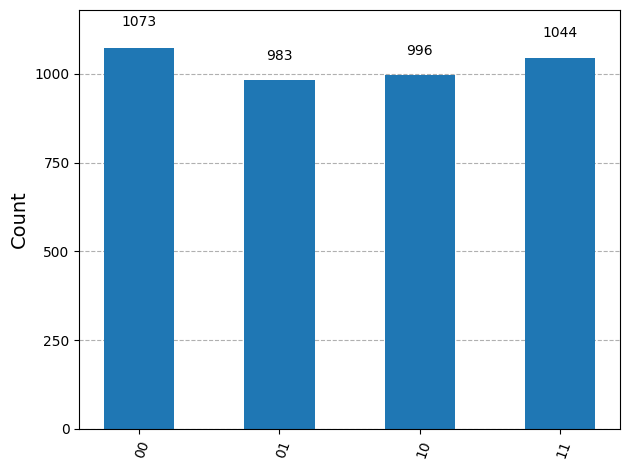

'Increasing shots improves statistical accuracy — the histogram becomes more stable and better reflects the expected probabilities.'

In [11]:
# 4. Increase Measurement Shots

qc = QuantumCircuit(2,2)

qc.x(0)
qc.h([0,1])
qc.cx(0,1)

qc.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc,simulator)

job = simulator.run(compiled_circuit,shots = 4096)
result = job.result()

counts = result.get_counts()

print("Measurement Results:",counts)
print(qc.draw('text'))
display(plot_histogram(counts))

'''Increasing shots improves statistical accuracy — the histogram becomes more stable and better reflects the expected probabilities.'''

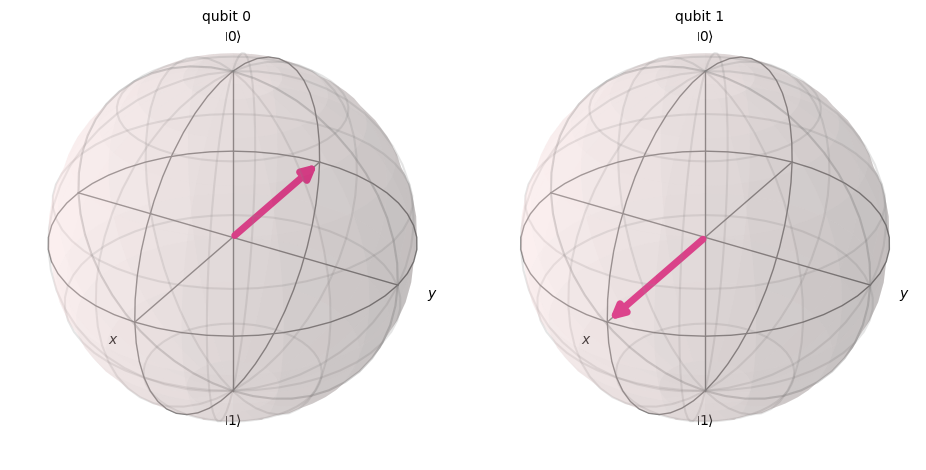

Measurement Results: {'11': 1041, '00': 1039, '10': 1017, '01': 999}
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ H ├─────┤ X ├─╫─┤M├
     └───┘     └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


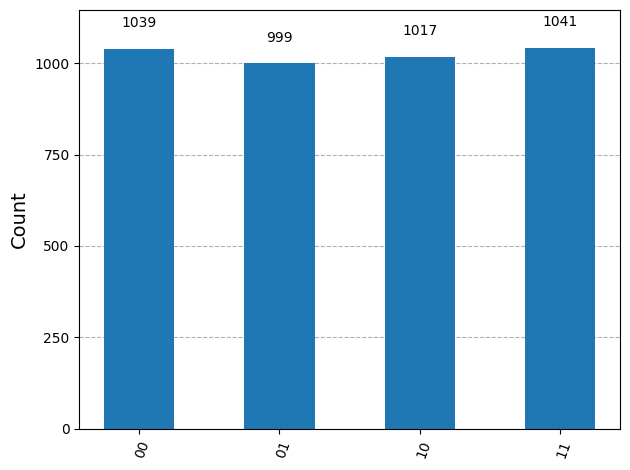

'The Bloch multivector reveals the qubits’ entangled superposition, showing how their states are correlated beyond simple measurement outcomes.'

In [12]:
# 5. Add a New Visualization

qc = QuantumCircuit(2,2)

qc.x(0)
qc.h([0,1])
qc.cx(0,1)

state = Statevector.from_instruction(qc)

display(plot_bloch_multivector(state))

qc.measure([0,1],[0,1])

simulator = AerSimulator()

compiled_circuit = transpile(qc,simulator)

job = simulator.run(compiled_circuit,shots = 4096)
result = job.result()

counts = result.get_counts()

print("Measurement Results:",counts)
print(qc.draw('text'))
display(plot_histogram(counts))

'''The Bloch multivector reveals the qubits’ entangled superposition, showing how their states are correlated beyond simple measurement outcomes.'''